In [1]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [2]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [3]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_incremental_corrected2.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats



                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL            transit_multiplicity intact_frac  \
0  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
1  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
2  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
3  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
4  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   

  disrupted_frac intact_frac2  ...          old40_logL  \
0            0.0

In [4]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)



/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_781/2703327151.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first]


In [5]:
df.intact_frac # old way of calculating fraction of total FGK systems that are intact

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78315    0.9
78316    0.9
78317    1.0
78318    1.0
78319    1.0
Name: intact_frac, Length: 78320, dtype: float64

In [6]:
df.disrupted_frac

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78315    0.0
78316    0.0
78317    0.0
78318    0.0
78319    0.0
Name: disrupted_frac, Length: 78320, dtype: float64

In [7]:
df.intact_frac2 # new way of calculating fraction of planet-hosting FGK systems that are intact

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78315    1.0
78316    1.0
78317    1.0
78318    1.0
78319    1.0
Name: intact_frac2, Length: 78320, dtype: float64

In [8]:
df.disrupted_frac2

0        1.000000
1        0.999985
2        1.000000
3        1.000000
4        1.000000
           ...   
78315    0.000000
78316    0.000000
78317    0.000000
78318    0.000000
78319    0.000000
Name: disrupted_frac2, Length: 78320, dtype: float64

In [9]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c):
    if m==0:
        return 1e8
    else:
        return c
    
def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
df['likelihood'] = np.exp(df['logL'])
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1)
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))


In [10]:
print(len(df.loc[df.normalized_logL > -50]), len(df.loc[df.logL > -50]))

9750 949


In [11]:
### make logL-based cut
threshold = -50
df_keep = df.loc[(df.logL >= threshold)] 
print(len(df_keep))

949


In [12]:
df_keep.f.unique()

array([0.2])

remaining based on transit multiplicity:  949
remaining after ruling out intact fractions:  949


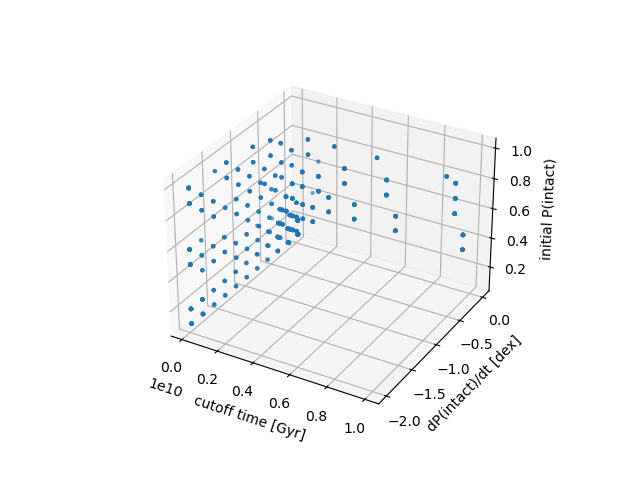

In [12]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("remaining based on transit multiplicity: ", len(df_keep))
#df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

In [19]:
df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['b','fixed_c']).sum('logL')

m             c    f         logL  intact_frac  \
b   fixed_c                                                           
0.0 1.000000e+08 -11.0  3.447833e+09  2.2 -1756.336564     0.000000   
    1.584893e+08 -11.0  1.584893e+09  2.0 -1590.312366     0.000000   
    2.511886e+08 -11.0  2.511886e+09  2.0 -1595.005397     0.000000   
    3.981072e+08 -11.0  3.981072e+09  2.0 -1606.605182     0.000000   
    6.309573e+08 -11.0  6.309573e+09  2.0 -1595.075503     0.000000   
...                ...           ...  ...          ...          ...   
1.0 1.584893e+09 -11.0  1.584893e+10  2.0 -1640.308457     0.493134   
    2.511886e+09 -11.0  2.511886e+10  2.0 -1655.977339     0.427275   
    3.981072e+09 -11.0  3.981072e+10  2.0 -1581.981719     0.381027   
    6.309573e+09 -11.0  6.309573e+10  2.0 -1524.540420     0.359924   
    1.000000e+10 -11.0  1.000000e+11  2.0 -1622.283780     0.354778   

                  disrupted_frac  intact_frac2  disrupted_frac2   intact_logL  \
b   fixed_c                                                                     
0.0 1.000000e+08        2.199998      0.000000        10.999984      0.000000   
    1.584893e+08        2.000000      0.000000        10.000000      0.000000   
    2.511886e+08        1.999999      0.000000         9.999993      0.000000   
    3.981072e+08        1.999999      0.000000         9.999994      0.000000   
    6.309573e+08        2.000000      0.000000        10.000000      0.000000   
...                          ...           ...              ...           ...   
1.0 1.584893e+09        1.506866      1.614856         8.385144 -10565.345326   
    2.511886e+09        1.572725      1.367687         8.632313 -14625.702369   
    3.981072e+09        1.618973      1.194722         8.805278 -12961.740141   
    6.309573e+09        1.640076      1.107837         8.892163 -16873.184920   
    1.000000e+10        1.645222      1.076114         8.923886 -19575.677567   

                  disrupted_logL  ...  young40_logL   old40_logL  \
b   fixed_c                       ...                              
0.0 1.000000e+08     -264.131985  ...  -4047.484513 -1819.465706   
    1.584893e+08     -233.762749  ...  -3646.075688 -1640.575858   
    2.511886e+08     -238.455779  ...  -3631.365840 -1658.276238   
    3.981072e+08     -260.352385  ...  -3688.337400 -1668.035739   
    6.309573e+08     -238.525885  ...  -3687.365820 -1639.688617   
...                          ...  ...           ...          ...   
1.0 1.584893e+09    -1287.606536  ...  -4089.026918 -1992.906127   
    2.511886e+09    -1067.394171  ...  -4188.574179 -1911.628654   
    3.981072e+09     -934.493940  ...  -4174.416468 -1902.721485   
    6.309573e+09     -860.749584  ...  -4057.954918 -1997.417648   
    1.000000e+10     -818.754652  ...  -4306.110369 -1991.429634   

                  young45_logL   old45_logL  young50_logL   old50_logL  \
b   fixed_c                                                              
0.0 1.000000e+08  -3208.095187 -2326.138705  -2555.705283 -2920.090853   
    1.584893e+08  -2891.113265 -2094.548559  -2297.192169 -2638.069026   
    2.511886e+08  -2872.663814 -2122.512169  -2293.983092 -2656.034426   
    3.981072e+08  -2943.872484 -2116.993474  -2354.563156 -2649.689795   
    6.309573e+08  -2924.799910 -2093.740213  -2329.461453 -2630.721569   
...                        ...          ...           ...          ...   
1.0 1.584893e+09  -3346.023399 -2427.460253  -2778.962197 -2937.047729   
    2.511886e+09  -3439.200120 -2351.241785  -2865.857398 -2868.054022   
    3.981072e+09  -3433.241155 -2341.649899  -2844.508278 -2876.981346   
    6.309573e+09  -3317.510678 -2245.631526  -2740.545363 -2767.400588   
    1.000000e+10  -3551.831050 -2246.032268  -2987.055243 -2752.365611   

                  normalized_logL  normalized_likelihood  redundant  \
b   fixed_c                                                           
0.0 1.000000e+08     -1741.002220           3.640461e

In [20]:
df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['m','b']).sum('likelihood').likelihood.sum()


2.184203451841411e-09

In [21]:
df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['m','fixed_c']).sum('likelihood').likelihood.sum()


2.184203451841411e-09

In [22]:
df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['fixed_c','b']).sum('likelihood').likelihood.sum()


2.184203451841411e-09

Looks like the difference in heatmap sums comes from the fact that different two-combinations of {m, b, c} might not have the full complement of 11 samples. 

2.8751520025204973e-221 4.560420615180872e-10 2.184203451841411e-09 -9513.903161304464 -19.942014627797423
-507.8152000083905 -21.50843607049678


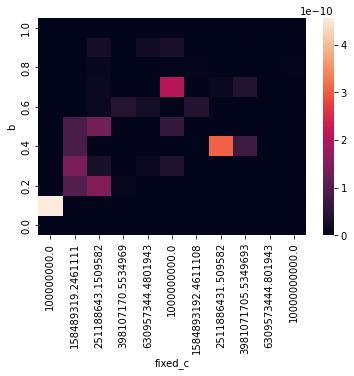

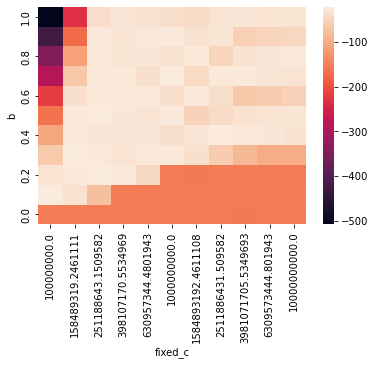

In [32]:
%matplotlib inline
import matplotlib.ticker as ticker

cvals = np.logspace(8, 10, 11)
mvals = np.linspace(-2, 0, 11)
bvals = np.linspace(0, 1, 11)

###tick = ticker.ScalarFormatter(useOffset=True, useMathText=True)
#tick.set_powerlimits((0,0))
###tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#"${}$".format(f._formatSciNotation('%1.10e' % x))

piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['b','fixed_c']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "fixed_c","likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

#sns.heatmap(piv, fmt='.1e')
ax = sns.heatmap(piv, #xticklabels=tc,
                 yticklabels=df.b.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

ax = sns.heatmap(np.log(piv), fmt='.1e', vmin=-508, vmax=-21, #xticklabels=tc,
                 yticklabels=df.b.unique().round(1)) # choose vmax as max of the three heatmaps' vmaxes; same idea for vmin
#ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
fig.tight_layout()
plt.savefig('marginalize_m.pdf', format='pdf', bbox_inches='tight')
plt.show()

2.667214743671529e-221 3.811516410849244e-10 2.184203451841411e-09 -8169.595768025688 -19.942014627797423
-507.8902707909137 -21.687823811889146


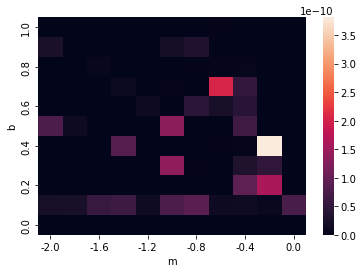

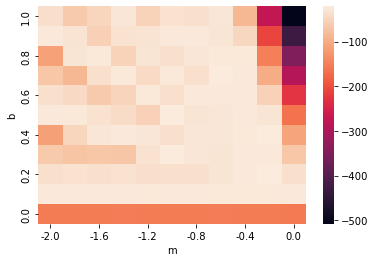

In [33]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['b','m']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "m","likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

#ax = sns.heatmap(np.log(piv), vmin=-455, vmax=-17.9, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
ax = sns.heatmap(np.log(piv), xticklabels=df.m.unique().round(1), vmin=-508, vmax=-21,
                 yticklabels=df.b.unique().round(1))

ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()

fig.tight_layout()
plt.savefig('marginalize_c.pdf', format='pdf', bbox_inches='tight')
plt.show()

8.397540322955824e-69 3.0562964736339e-10 2.184203451841411e-09 -8689.243212258993 -19.942014627797423
-156.7504325723154 -21.90864704971804


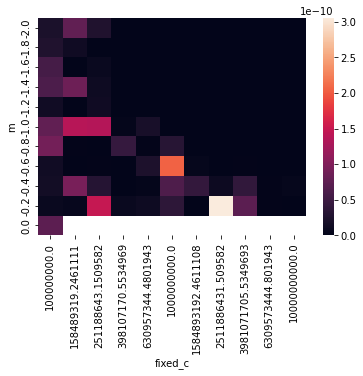

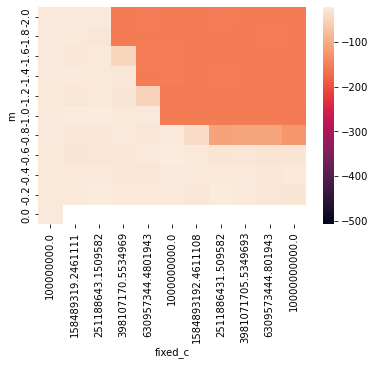

In [34]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).mean('likelihood').reset_index().groupby(['m','fixed_c']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("m", "fixed_c","likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1), vmin=-508, vmax=-21,)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
plt.savefig('marginalize_b.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [35]:
df.loc[(df.f == 0.2) &(df.c >9.5e9) &(np.round(df.b,1)==0.3)  ]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant,likelihood
4739,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.969441,"[818.6, 76.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-226.414898,"[424.0, 41.2]",-271.406338,"[394.6, 35.4]","[937.2933422698839, 87.70665773011618, 0.0, 0....",-159.836931,3.834448e-70,1.000000e+10,False,1.235549e-70
4740,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-158.477401,"[823.6, 80.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-218.362575,"[434.0, 40.6]",-266.683537,"[389.6, 39.400000000000006]","[934.2518813634351, 90.74811863656485, 0.0, 0....",-157.976311,2.464677e-69,1.000000e+10,False,1.493273e-69
4741,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.999596,"[805.8000000000001, 77.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-242.547547,"[405.8, 42.2]",-267.174895,"[400.0, 34.800000000000004]","[935.5969642048029, 89.4030357951971, 0.0, 0.0...",-158.778903,1.104584e-69,1.000000e+10,False,1.198847e-70
4742,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.873629,"[812.0, 75.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-230.493987,"[414.20000000000005, 43.800000000000004]",-278.649288,"[397.8, 31.8]","[937.6971608832807, 87.30283911671924, 0.0, 0....",-160.096510,2.957803e-70,1.000000e+10,False,5.002373e-71
4743,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-163.801782,"[811.8000000000001, 73.2, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-253.186835,"[407.0, 37.2]",-258.695588,"[404.8, 36.0]","[940.2203389830509, 84.77966101694915, 0.0, 0....",-161.787924,5.450010e-71,1.000000e+10,False,7.274275e-72
4744,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-157.840005,"[809.4000000000001, 81.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-231.946168,"[418.8, 41.0]",-263.189614,"[390.6, 40.400000000000006]","[931.3370004490347, 93.66299955096542, 0.0, 0....",-156.342872,1.262274e-68,1.000000e+10,False,2.824598e-69
4745,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-162.564889,"[809.6, 74.8, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-251.643830,"[400.20000000000005, 40.800000000000004]",-259.542286,"[409.40000000000003, 34.0]","[938.3084577114428, 86.6915422885572, 0.0, 0.0...",-160.495215,1.985243e-70,1.000000e+10,False,2.505911e-71
4746,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-156.863682,"[834.0, 82.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-206.755840,"[438.20000000000005, 44.2]",-262.676409,"[395.8, 38.2]","[932.8350065473593, 92.16499345264077, 0.0, 0....",-157.164574,5.549998e-69,1.000000e+10,False,7.498399e-69
4747,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.907280,"[817.4000000000001, 75.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,-230.794022,"[423.8, 39.400000000000006]",-270.867862,"[393.6, 36.0]","[938.435259856631, 86.56474014336918, 0.0, 0.0...",-160.578795,1.826062e-70,1.000000e+10,False,4.836840e-71
4748,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-154.589947,"[815.4000000000001, 86.60000000000001, 0.0, 0....",0.000000,0.200000,0.000000,...,-232.758788,"[410.0, 44.800000000000004]",-243.845246,"[405.40000000000003, 41.800000000000004]","[926.5909090909092, 98.4090909090909, 0.0, 0.0...",-153.975077,1.347330e-67,1.000000e+10,False,7.285160e-68


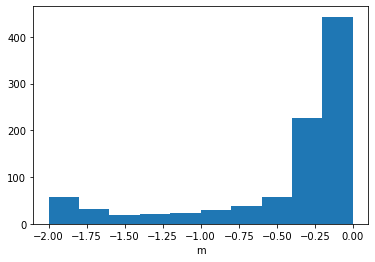

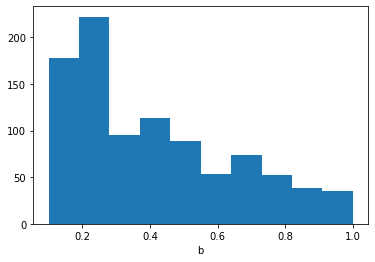

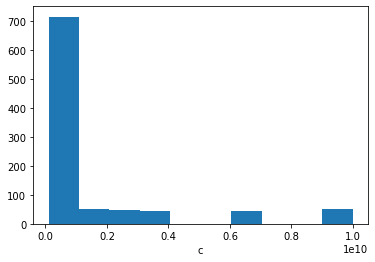

In [36]:
plt.hist(df_keep.m)
plt.xlabel('m')
plt.show()

plt.hist(df_keep.b)
plt.xlabel('b')
plt.show()

plt.hist(df_keep.fixed_c)
plt.xlabel('c')
plt.show()

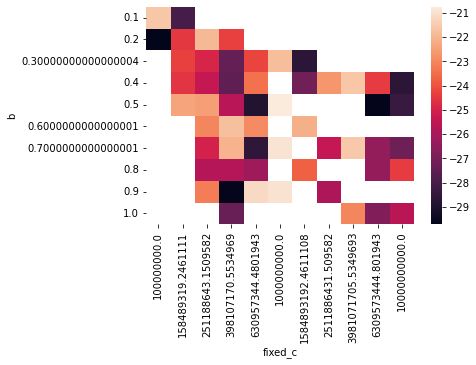

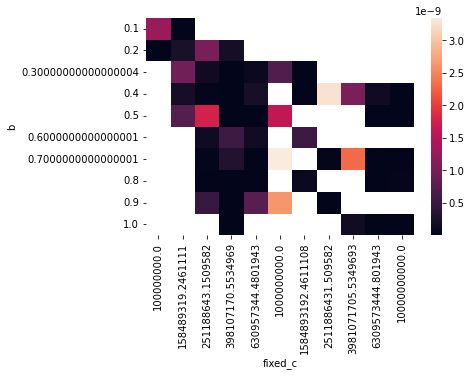

In [23]:
### mean of logL

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_logL').reset_index()
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
#piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("b", "fixed_c", "normalized_logL")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_likelihood').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

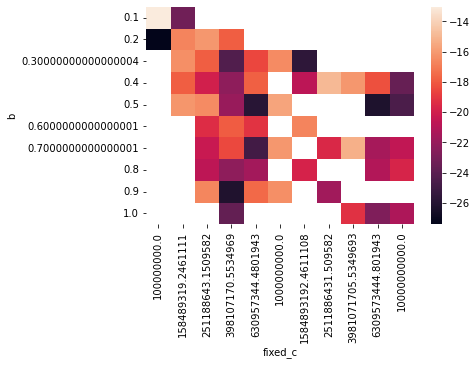

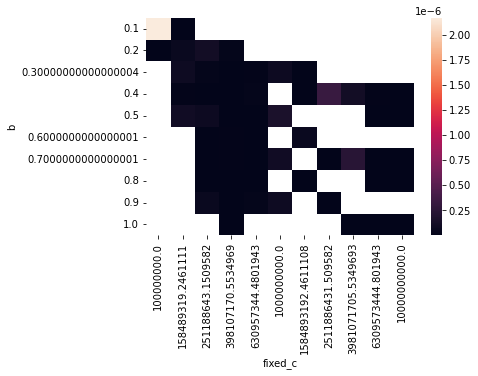

In [24]:
### sum of likelihood, and then re-logged

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("b", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

In [37]:
df_a = df_keep.loc[(np.round(df_keep.b,1) == 0.3) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [38]:
df_b = df_keep.loc[(np.round(df_keep.b,1) == 0.4) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [39]:
df_c = df_keep.loc[(np.round(df_keep.b,1) == 0.5) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [40]:
df_z = df_keep.loc[(np.round(df_keep.b,1) == 1.0) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

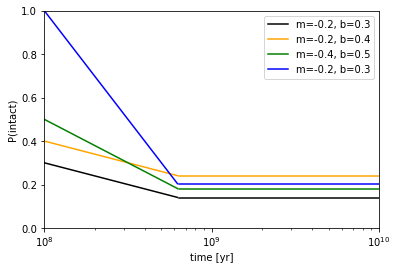

In [41]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)
m = -0.2
b = 0.3
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='k', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='k')

m = -0.2
b = 0.4
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='orange', label='m=-0.2, b=0.4')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='orange')

m = -0.4
b = 0.5
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='green', label='m=-0.4, b=0.5')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='green')

m = -1.0
b = 1.0
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='blue', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='blue')

plt.xlim(1e8, 1e10)
plt.ylim(0, 1)
plt.xscale('log')
plt.ylabel('P(intact)')
plt.xlabel('time [yr]')
plt.legend()
plt.show()

#### Zero-bin

Favored models

In [66]:
df_keep

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,likelihood,fixed_c,redundant
1230,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-23.583324,"[795.8000000000001, 108.80000000000001, 25.400...",0.058114,0.141886,0.100564,...,-241.264843,"[407.8, 56.2, 13.8, 8.8, 3.0, 1.8]",-272.622732,"[388.0, 52.6, 11.600000000000001, 7.2, 3.80000...","[853.7732886749005, 116.72597864768683, 27.250...",-21.107589,6.809115e-10,5.726542e-11,100000000.0,True
1231,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-29.143523,"[801.4000000000001, 94.2, 24.6, 18.0, 7.600000...",0.058030,0.141970,0.100267,...,-252.714025,"[404.20000000000005, 51.400000000000006, 13.60...",-279.793038,"[397.20000000000005, 42.800000000000004, 11.0,...","[865.944549862956, 101.78684376976597, 26.5812...",-26.146328,4.413612e-12,2.203580e-13,100000000.0,True
1232,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-24.514963,"[795.4000000000001, 101.0, 29.0, 13.6000000000...",0.058558,0.141442,0.101365,...,-251.419019,"[404.0, 52.2, 13.8, 7.4, 4.6000000000000005, 1...",-269.575086,"[391.40000000000003, 48.800000000000004, 15.20...","[858.5562342038754, 109.01958719460825, 31.302...",-21.597738,4.170820e-10,2.255729e-11,100000000.0,True
1233,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-26.798516,"[788.8000000000001, 99.4, 25.200000000000003, ...",0.057408,0.142592,0.098828,...,-251.489349,"[406.8, 51.2, 11.8, 10.4, 5.2, 1.0]",-282.708023,"[382.0, 48.2, 13.4, 8.0, 3.2, 0.8]","[858.3014861995754, 108.15817409766454, 27.420...",-23.244833,8.033357e-11,2.299071e-12,100000000.0,True
1234,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-25.852498,"[755.8000000000001, 106.0, 26.8, 15.6000000000...",0.057670,0.142330,0.099466,...,-270.176678,"[380.20000000000005, 57.6, 13.200000000000001,...",-289.255288,"[375.6, 48.400000000000006, 13.600000000000001...","[847.0314891755959, 118.79510168379619, 30.034...",-19.442391,3.599788e-09,5.921104e-12,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-39.495228,"[759.0, 125.60000000000001, 57.400000000000006...",0.095696,0.104304,0.200030,...,-242.669755,"[387.0, 64.0, 26.200000000000003, 20.400000000...",-258.745505,"[372.0, 61.6, 31.200000000000003, 16.400000000...","[778.4420652391435, 128.81729037422454, 58.870...",-39.170116,9.741700e-18,7.037853e-18,100000000.0,True
74408,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.215829,"[767.6, 122.2, 49.2, 37.2, 16.0, 4.4]",0.096286,0.103714,0.201692,...,-231.497393,"[395.20000000000005, 65.4, 25.400000000000002,...",-268.897912,"[372.40000000000003, 56.800000000000004, 23.8,...","[789.4742123218945, 125.68231988761791, 50.602...",-36.814963,1.026750e-16,6.876553e-17,100000000.0,True
74409,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.717220,"[747.8000000000001, 133.4, 57.0, 38.0, 12.6000...",0.096035,0.103965,0.200787,...,-228.506146,"[391.20000000000005, 70.60000000000001, 28.8, ...",-278.389567,"[356.6, 62.800000000000004, 28.200000000000003...","[772.8322242387578, 137.8654970760234, 58.9080...",-37.167642,7.216024e-17,4.165041e-17,100000000.0,True
74410,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-38.466918,"[755.8000000000001, 134.4, 53.6, 35.0, 17.2, 4.4]",0.095145,0.104855,0.198442,...,-245.853421,"[382.0, 67.4, 25.200000000000003, 18.2, 10.200...",-252.067216,"[373.8, 67.0, 28.400000000000002, 16.8, 7.0, 1.6]","[774.3852459016393, 137.70491803278688, 54.918...",-38.166908,2.656577e-17,1.968021e-17,100000000.0,True


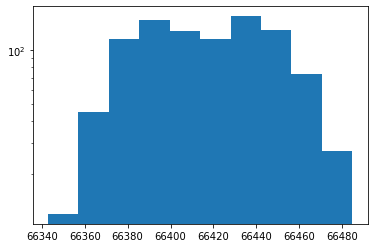

In [67]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df_keep.transit_multiplicity):
    zero_bins.append(67380-np.sum(i))
    temp = df_keep.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [68]:
df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_956/930433814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin


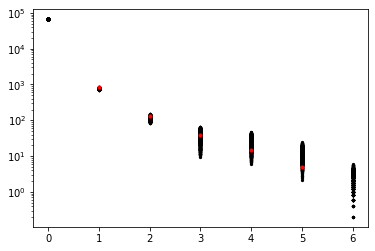

In [69]:
for i in range(len(df_keep)):
    plt.scatter(np.arange(7), df_keep.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

All models

In [35]:
df

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant
0,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
1,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
2,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
3,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
4,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78315,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3811.522896,"[2277.9, 1598.4, 1112.4, 762.3000000000001, 36...",0.9,0.0,1.0,...,"[1252.8, 875.7, 601.2, 420.3, 189.9, 37.800000...",-1478.074096,"[1147.5, 812.7, 570.6, 384.3, 201.6, 50.4]",-1365.080776,"[1130.4, 785.7, 541.8000000000001, 378.0, 166....","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True
78316,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3805.139345,"[2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...",0.9,0.0,1.0,...,"[1232.1000000000001, 825.3000000000001, 635.4,...",-1468.749064,"[1161.9, 790.2, 573.3000000000001, 405.0, 198....",-1376.593747,"[1102.5, 748.8000000000001, 579.6, 392.4000000...","[375.16729706139074, 254.98254291533314, 191.0...",-486.174721,7.194512e-212,100000000.0,True
78317,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4400.422949,"[2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]",1.0,0.0,1.0,...,"[1423.0, 956.0, 693.0, 450.0, 227.0, 42.0]",-1691.015415,"[1337.0, 861.0, 643.0, 407.0, 223.0, 50.0]",-1611.277304,"[1275.0, 856.0, 616.0, 409.0, 207.0, 36.0]","[386.89306358381504, 254.32442196531792, 186.4...",-462.889185,9.327843e-202,100000000.0,True
78318,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4392.528368,"[2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]",1.0,0.0,1.0,...,"[1392.0, 973.0, 668.0, 467.0, 211.0, 42.0]",-1721.979568,"[1275.0, 903.0, 634.0, 427.0, 224.0, 56.0]",-1594.186247,"[1256.0, 873.0, 602.0, 420.0, 185.0, 35.0]","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True


In [ ]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df.transit_multiplicity):
    zero_bins.append(67380-np.sum(i))
    temp = df.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
df['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

In [ ]:
df.transit_multiplicity_zero_bin

In [ ]:
for i in range(len(df)):
    try:
        plt.scatter(np.arange(7), df.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        print(df.reset_index().transit_multiplicity_zero_bin[i])
        
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

#### Do the favored normalized models produce reasonable transit multiplicities and intact fractions? 

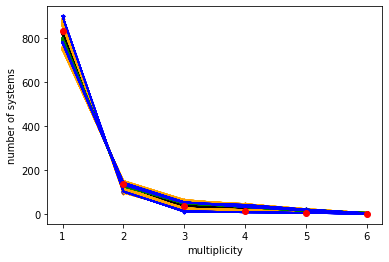

In [58]:
for i in df_a.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='k', s=5)
    plt.plot(np.arange(7)[1:], i, color='k')

for i in df_b.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='orange', s=5)
    plt.plot(np.arange(7)[1:], i, color='orange')
    
for i in df_c.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='green', s=5)
    plt.plot(np.arange(7)[1:], i, color='green')
    
for i in df_z.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='blue', s=5)
    plt.plot(np.arange(7)[1:], i, color='blue')
    
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2)
    
plt.ylabel('number of systems')
plt.xlabel('multiplicity')
plt.show()

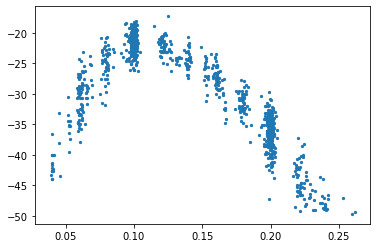

In [70]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL, s=5)
plt.show()

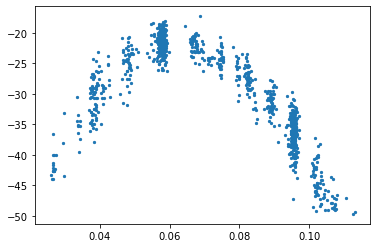

In [71]:
plt.scatter(df_keep.intact_frac, df_keep.normalized_logL, s=5)
plt.show()

No.

In [60]:
print(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.4
print(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0)) # what? oh, it's cause m=-1.0

print(better_loglike(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0), k))

[821.76976037 124.00062276  37.00841174  25.8739389   12.51112424
   3.09795659]
[860.67029786 113.74907643  25.03023066  17.36566619   8.03430725
   2.20892988]
[790.9934232  129.37119796  49.12096259  33.70498153  15.42104753
   3.22640934]
[781.47678897 132.48997996  50.3256513   31.37543077  16.83052909
   1.66666667]
-23.61041734842737
-22.498826282832255
-31.530187010266495
-30.464266012068126


Looks like the problem of non-smooth color gradients in the heatmap comes largely from the fact that 11x11x11 is just not fine enough of a sample grid. Also, small number statistics...but the variances in logL aren't big enough to explain that away. 

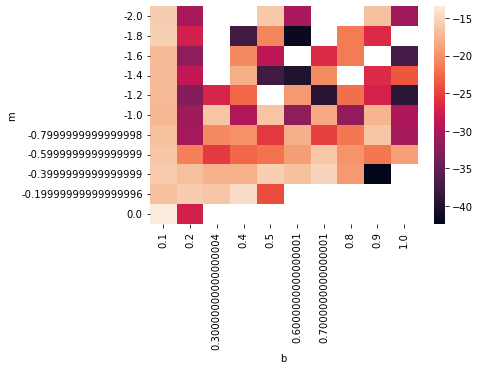

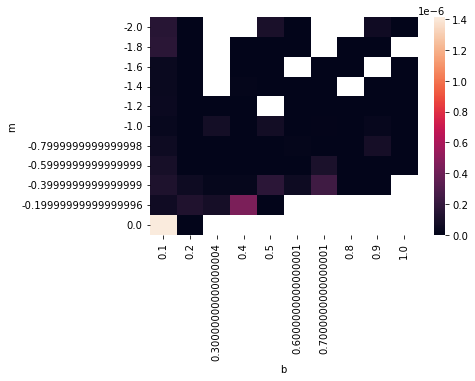

In [61]:
piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "b", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "b", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

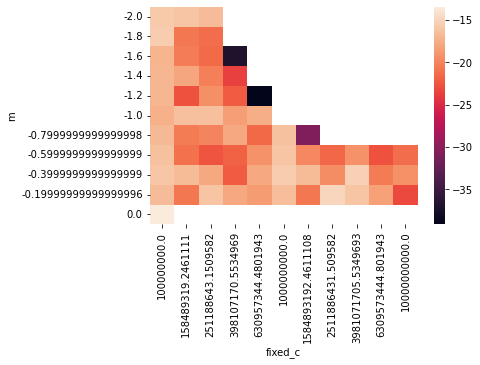

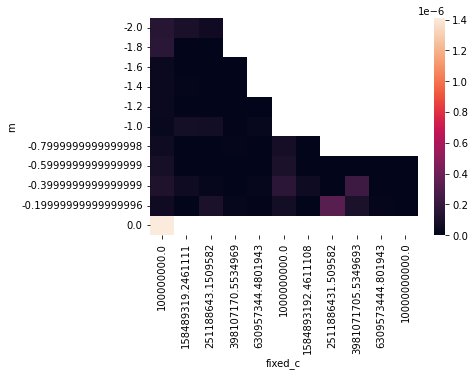

In [62]:
piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()